**Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/Bigmart1.csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print(df.shape)

(8523, 12)


In [ ]:
print(df.size)

102276


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

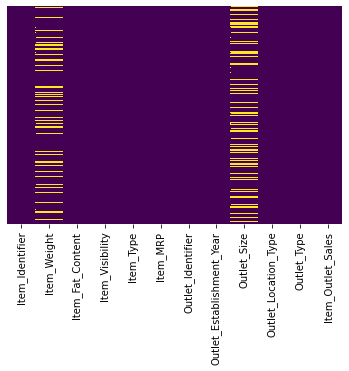

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
avgWeight = {}
for i in set(df['Item_Identifier']):
  avgWeight[i] = (df[df['Item_Identifier'] == i]['Item_Weight'].mean())

In [ ]:
df[df['Item_Identifier'] == 'FDN52']['Item_Weight']

927   NaN
Name: Item_Weight, dtype: float64

In [ ]:
def imputeItemWeight(cols):
  identifier = cols[0]
  weight = cols[1]
  if pd.isnull(weight):
    return avgWeight[identifier]
  else:
    return weight

In [ ]:
df['Item_Weight'] = df[['Item_Identifier', 'Item_Weight']].apply(imputeItemWeight, axis=1)

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df[df['Item_Weight'].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
from scipy.stats import mode
outletSizeMode = {}
for i in set(df['Outlet_Type']):
  outletSizeMode[i] = df[df['Outlet_Type'] == i]['Outlet_Size'].mode()[0]

print(outletSizeMode)

{'Grocery Store': 'Small', 'Supermarket Type1': 'Small', 'Supermarket Type3': 'Medium', 'Supermarket Type2': 'Medium'}


In [ ]:
def imputeOutletSize(cols):
  Type = cols[0]
  Size = cols[1]
  
  if pd.isnull(Size):
    return outletSizeMode[Type]
  else:
    return Size

In [ ]:
df['Outlet_Size'] = df[['Outlet_Type', 'Outlet_Size']].apply(imputeOutletSize, axis=1)

In [ ]:
df['Outlet_Size'].head(20)

0     Medium
1     Medium
2     Medium
3      Small
4       High
5     Medium
6       High
7     Medium
8      Small
9      Small
10    Medium
11     Small
12    Medium
13     Small
14      High
15     Small
16    Medium
17    Medium
18    Medium
19     Small
Name: Outlet_Size, dtype: object

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

In [ ]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [ ]:
print(df['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


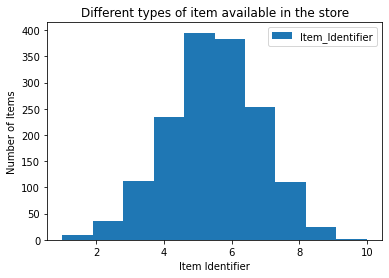

In [ ]:
df['Item_Identifier'].value_counts(normalize = True)
df['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

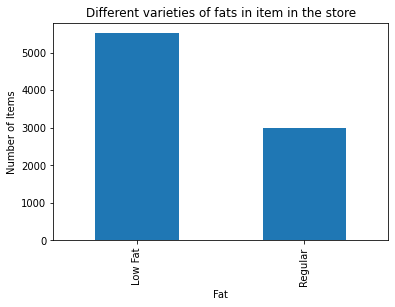

In [ ]:
df['Item_Fat_Content'].value_counts(normalize = True)
df['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

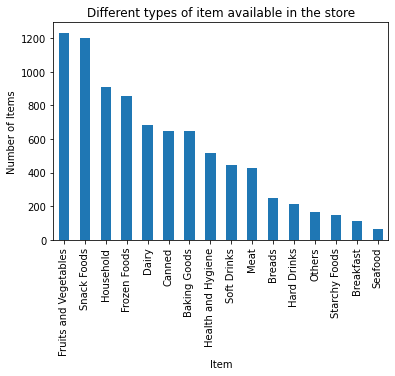

In [ ]:
df['Item_Type'].value_counts(normalize = True)
df['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different types of Outlet Identifier

df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

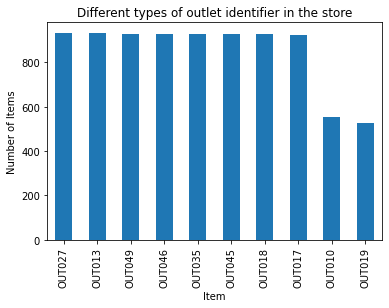

In [ ]:
df['Outlet_Identifier'].value_counts(normalize = True)
df['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different types of Outlet Size

df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

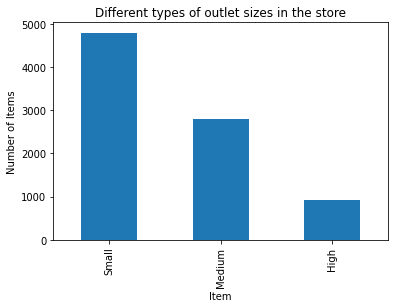

In [ ]:
df['Outlet_Size'].value_counts(normalize = True)
df['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking different types of items in Outlet Location Type

df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

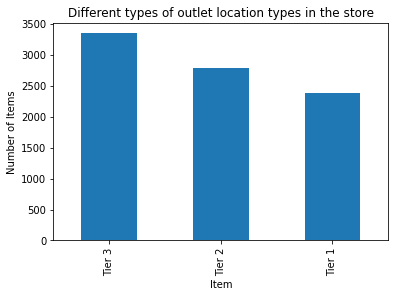

In [ ]:
df['Outlet_Location_Type'].value_counts(normalize = True)
df['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking different types of item in Outlet Type

df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

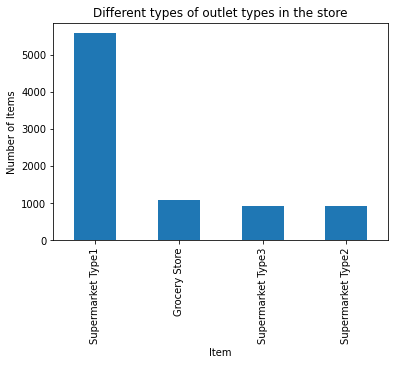

In [ ]:
df['Outlet_Type'].value_counts(normalize = True)
df['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

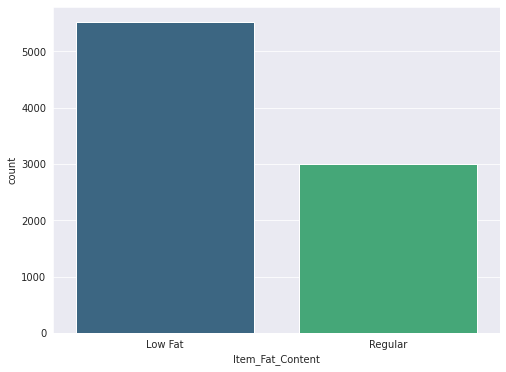

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Item_Fat_Content', data=df, palette="viridis");
sns.despine;

In [ ]:
print(min(df['Item_Visibility']))

0.0


In [ ]:
df['Item_Visibility'].value_counts()[0]

526

In [ ]:
df['Item_Visibility'] = df['Item_Visibility'].replace({0:df['Item_Visibility'].mean()})

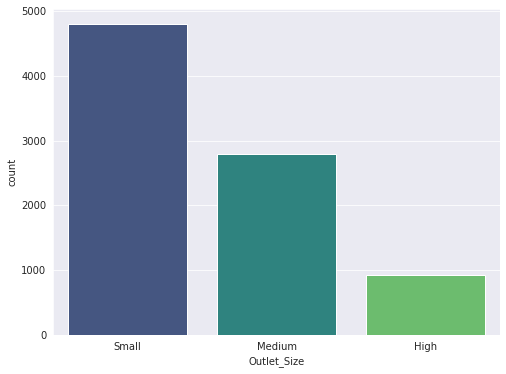

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Outlet_Size', data=df, palette="viridis", order=['Small', 'Medium', 'High']);
sns.despine;

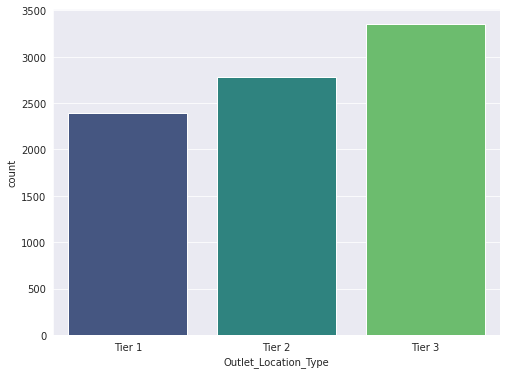

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Outlet_Location_Type', data=df, palette="viridis", order=['Tier 1', 'Tier 2', 'Tier 3']);
sns.despine;

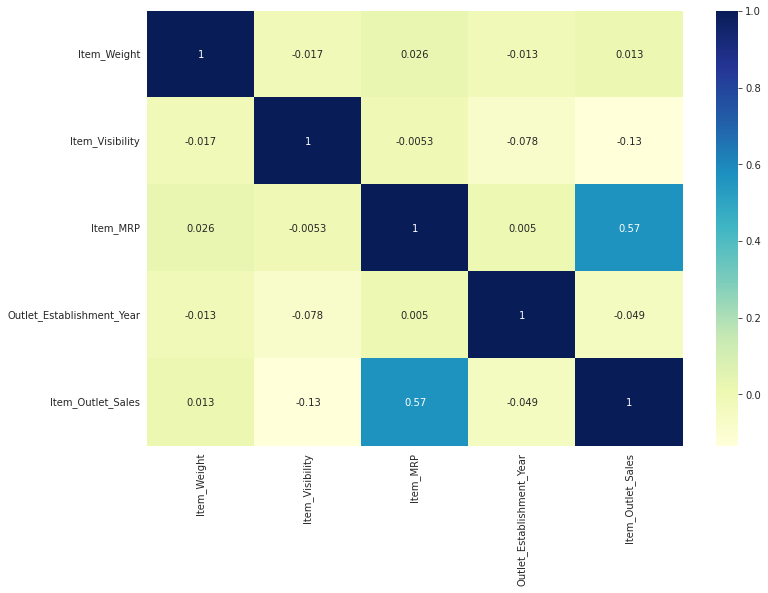

In [ ]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True);

**Feature engineering**

In [ ]:
data = df.copy()
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print(data['Item_Type'].nunique())
print(data['Item_Type'].unique())

16
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [ ]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x : x[0:2])
data['Item_Type_Combined'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_Type_Combined, dtype: object

In [ ]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'DR':'Drinks', 'NC':'Non-Consumable'})
data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [ ]:
data['Outlet_Operation_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Operation_Years'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Operation_Years, dtype: int64

In [ ]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Operation_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']
encode = LabelEncoder()

for item in categorical_cols:
  data[item] = encode.fit_transform(data[item])

In [ ]:
data = pd.get_dummies(data, columns=categorical_cols)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Item_Outlet_Sales          8523 non-null   float64
 7   Outlet_Operation_Years     8523 non-null   int64  
 8   Item_Fat_Content_0         8523 non-null   uint8  
 9   Item_Fat_Content_1         8523 non-null   uint8  
 10  Item_Fat_Content_2         8523 non-null   uint8  
 11  Outlet_Location_Type_0     8523 non-null   uint8  
 12  Outlet_Location_Type_1     8523 non-null   uint8  
 13  Outlet_Location_Type_2     8523 non-null   uint8

In [ ]:
X = data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

In [ ]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Operation_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,9.30,0.016047,249.8092,14,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,4,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,14,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.066132,182.0950,15,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.066132,53.8614,26,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Building regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(normalize=True)

**Prediction and evaluation**

In [ ]:
predict = lm.predict(X_test)
print('Score: ')
lm.score(X_test, y_test)
#r2_score(y_train, lm.predict(y_test))

Score: 


0.5685385716347378

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 809.3669808369183
MSE: 1159170.2319531897
RMSE: 1076.647682370231


**Random forest regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

**Prediction and evalution**

In [ ]:
rfpredict = rf.predict(X_test)
print('Score: ')
rf.score(X_test, y_test)

Score: 


0.5679106177059129

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, rfpredict))
print('MSE:', metrics.mean_squared_error(y_test, rfpredict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfpredict)))

MAE: 761.0828541181071
MSE: 1160857.3016504506
RMSE: 1077.4308802194462


**Decision tree model**

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [ ]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1471.86266787, 2468.9944625 , 1808.6857972 , ..., 1471.86266787,
       3139.96117009, 4071.19806567])

In [ ]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.57

In [ ]:
r2_score(y_train, regressor.predict(X_train))

0.6366861899311251

In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1131


**XGBooster**

In [ ]:
from xgboost import XGBRegressor
regressor=XGBRegressor()
regressor.fit(X_train,y_train)


[08:13:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# predicting the test set results
y_pred = regressor.predict(X_test)
print(y_pred)
# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

[1377.7054 2561.2925 1380.0808 ... 1434.3055 3198.0376 3814.3193]
RMSE : 1024.0522593480985


In [ ]:
regressor.score(X_test, y_test) 

0.6096636494794339

**THANKYOU**🙏🙏🙏🙏🙏